# Week 2A: Accessing data from Wikipedia

## Learning to use the ‘requests‘ Python library

In this notebook we use the Wikipedia API with generic tools which could be used to access any API. API stands ‘application programming interface‘, a way for computers to share information with each other. APIs create a promise that the same information will be accessible to an external user in the same way even if something changes behind the scenes. Each API has its own specification which tell you how to write a request to get the information you want, which comes with detailed documentation to follow. Typically, web APIs are queried by accessing a specfic URL which then returns a JSON or XML object. 

With Wikipedia, we will use the documentation to manually select the parameters we want, form them into a URL, call it, and parse the answer. For many APIs, there are custom Python packages which make this easier to use. In the second notebook, we will look at a Python library specialised for the Reddit API. 

`requests` is a general purpose Python library to send HTTP requests, the technical protocol used to communicate with remote APIs. There are different types of HTTP requests that this library support and that you may encounter for more complex APIs (e.g., GET, POST, PUT, DELETE, etc.). For the purpose of requesting data from the APIs we cover in this couse, we will only need to learn about the GET requests. 

The library is extremely well documented with tutorials: https://docs.python-requests.org/en/latest/


In [1]:
%%capture
# Run this cell to install the requests library using the Python package manager pip
!pip install requests

In [2]:
import json
import pandas as pd
import requests

## Using the request library to query Wikipedia

Have a look at https://stats.wikimedia.org/#/en.wikipedia.org, this is what we'll be accessing today! You can get programmatic access to all of that: pages, pageviews, user contributions, etc.

### Wikipedia API

Wikimedia Foundation hosts several initiatives (e.g.,  Wikipedia, Wikibooks, Wikidata, etc.). All of the Wikimedia Wikis have specific API endpoints. For example, English Wikipedia has the following endpoint - https://en.wikipedia.org/w/api.php. 

The full details for the Wikimedia APIs are here: https://mediawiki.org/wiki/API:Main_page. 

That page lists several necessary parameters that are required in an URL string for their API:
- `action`
- `format`
- and some combination of `list`, `prop`, or `meta` depending on the requirement

`action` tells the endpoint what type of action is to be performed. For requesting data, we need `action` to be `query`. We will ask for the data in JSON format, so `format` is set to `json`. Finally, there are three broad types of query actions we can perform:

   - prop (https://www.mediawiki.org/wiki/Special:MyLanguage/API:Properties) - get properties of pages  
   - list (https://www.mediawiki.org/wiki/Special:MyLanguage/API:Lists) - get list of pages matching a certain criterion
   - meta (https://www.mediawiki.org/wiki/Special:MyLanguage/API:Meta) - get meta information about the wiki and user


The rest of the parameters will depend on the type of query action that is to be performed.

The Wikimedia Foundation also requires users of the API to send some information about who they are. This is a basic protection in case a query is causing issues. The identifying information is sent in the `header` of the HTTP request.

### Exercise 1: Querying the main Wikipedia API

<div class="alert alert-info">

**Exercise 1.1:** Use `requests` to search for English Wikipedia articles containing the term “Oxford”. Here are the parameters that we will need:
1. API endpoint: http://en.wikipedia.org/w/api.php
2. Parameters
   - `action=query`
   - `format=json`
   - `list=search`
   - `srsearch=oxford`

- Call `requests.get` with appropriate endpoint and parameters 
- Print the url that was accessed through the above call
- Print the response of the above call, i.e., use `.json()` method
- Read through some of the key-value pairs in the above `.json()` output. Which key corresponds to the search results? Is the value a `list` or a `dict`?
- Make a pandas `DataFrame` of the search results. What are the various columns available? Count the number of search articles that were returned by the query 

</div>

If you think you can manage this yourself, do so here and then continue to the next blue box. If you need more help, the subquestions below help to build the pieces you need before you put them together.

In [26]:
# Specific parameters for the Wikipedia API:
params = {
    
}

# Finally, we need to add some meta information identifying us so that the WikiMedia
# foundation can know who is querying what. This is specified by the headers variable.

# Replace the User-Agent with your own ‘user agent’, a unique name of your choosing that
# the Wikimedia sysadmin staff can identify in case of abuse. We provide a suggestion, but
# do replace the email address with your own email adddress so that Wikimedia can contact you
# if your scripts use too many resources:

WP_HEADERS = {
    'User-Agent': 'YOUR NAME (email@oii.ox.ac.uk)', 
}

# Because we are making a GET request (the most basic kind, which you will typically use)
# we use the requests.get() function.

# The requests package is doing a lot for us here. Rather than putting together the long
# url ourselves, we can pass a dictionary of parameters and it will append them to the URL.
# It also handles sending the header information for us.

r = requests.get("http://en.wikipedia.org/w/api.php", params=params, headers=WP_HEADERS)

If you were successful, move on to exercise 1.1a. If you are stuck, try the steps below.

Because we are making a GET request (the most basic kind, which you will typically use) we use the requests.get() function.

As you could see in the documentation, the requests get function needs: 
- a URL to query
- any params you want to pass
- any other args (in this case we have a `headers` arg to pass)

The line of code below does not run because the pieces are not filled in. We will now work on adding them.

`r = requests.get(your_url, params=your_params, headers=YOUR_HEADERS)`

In [21]:
# your_url should be the base URL for the API we want to access:

# your_url = ________

In [22]:
# params needs a dictionary where each key is the param to set, 
# and each value is the value for that param

# your_params = {'key': 'value'}

In [23]:
# YOUR_HEADERS needs a dictionary where there is one key, 
# 'User-Agent', and the value is your name and email.

# I have used ALL_CAPS for this variable because it is a 
# variable that I do not want to share with other users of 
# this code. Typically you would store this somewhere else 
# and load it from a file to protect it.

# YOUR_HEADERS = {'User-Agent': 'name (email@oii.ox.ac.uk)'}

In [25]:
# Now try calling the line of code from before with the new variables we've made

# r = requests.get("http://en.wikipedia.org/w/api.php", params=params, headers=WP_HEADERS)

<div class="alert alert-info">
<b>Exercise 1.1a:</b> Now we can see what the API returned by inspecting our variable `r`:
</div>

In [3]:
# Which URL was accessed?


In [4]:
# Result of the query to the API, automatically formatted as a Python dictionary by requests:


In [31]:
# Let's select all the articles and import them into a pandas DataFrame:

# 1) Get the json portion of the response to our request


# 2) Find which piece of the dicitonary has the search results


# 3) Use pd.DataFrame to convert the search results to a DataFrame
df_pages_oxford = pd.DataFrame()

In [6]:
# What columns are in this DataFrame?


In [5]:
# How many articles are there?

Does this number of articles make sense? What might have happened? Can you find the answer in the API documentation?

<div class="alert alert-info">

**Exercise 1.2 (optional):** Write a function that takes as a string input, `search_term`, and returns the wikipedia pages corresponding to that `search_term`. Call this function with the `search_term` as `oxford` and compare to what we did already. Then try another search term to see how using functions makes it easy to reuse code.

</div>

In [7]:
# I've given you the basic structure of a function here
# The part at the top in triple quotes is called a docstring, 
# which tells future users what the function does:
# what inputs does it expect, what output does it give

def search_pages(search_term):
    """
    Search for pages on Wikipedia matching a given query.
    Return a pandas DataFrame where each row is one Wikipedia page.
    """

    return df_pages_query
    

In [30]:
# This is how to test your function once it exists

df_pages_oxford = search_pages("oxford")
df_pages_oxford.head()

,ns,title,pageid,size,wordcount,snippet,timestamp
0,0,Oxford,22308,120200,9802,"<span class=""searchmatch"">Oxford</span> (/ˈɒks...",2023-01-11T21:50:20Z
1,0,University of Oxford,31797,194123,17413,"The University of <span class=""searchmatch"">Ox...",2023-01-13T18:12:19Z
2,0,Oxford University Press,48518,37490,4450,"<span class=""searchmatch"">Oxford</span> Univer...",2023-01-17T10:50:29Z
3,0,Oxford (cloth),2259236,1839,164,"<span class=""searchmatch"">Oxford</span> cloth ...",2023-01-05T22:41:19Z
4,0,Oxford United F.C.,451165,92650,9187,"<span class=""searchmatch"">Oxford</span> United...",2023-01-20T15:41:36Z


### Exercise 2: Accessing categories of a WP page

<div class="alert alert-info">

**Exercise 2.1:** List all the categories for the Wikipedia page of Ada Lovelace (https://en.wikipedia.org/wiki/Ada_Lovelace)

- Think of the parameters that you will pass along with the endpoint. What will be  `action`, `format`?
- Go back to the top of this notebok and read through the section on `wikipedia API`. Which one of `prop`, `list`, or `meta` will you use?
- For example, if you think `prop` is what we need, head over to the corresponding URL, i.e., https://www.mediawiki.org/wiki/API:Properties to check what are other related parameters that are neded. In this case, we need `titles` key to define our query, i.e, Ada Lovelace, and we are interested in `categories` property of this page, so `prop` must be `categories`. 
- Click on the corresponding `categories` link on that page, i.e., https://www.mediawiki.org/wiki/Special:MyLanguage/API:Categories to check additional parameters that can be passed to this endpoint. We will set `cllimit` to `max` so that we get back all possible categories instead of just 10 (defafult). 


</div>

In [8]:
# This should be very similar to what we just did. You need three things, a URL, params, and headers.

# YOUR CODE HERE
params = {
    "action": ,
    "prop": ,
    "titles": ,
    "format": ,
    "cllimit": "max",
}

r = requests.get("http://en.wikipedia.org/w/api.php", params=params, headers=WP_HEADERS)

<div class="alert alert-info">

**Exercise 2.2:** Access the categories of the resulting response 

- Look at the returned response from the API, i.e., investigate `.json()` output of the `requests.get` formulated above
- How do you access the categories of the query? 
- Print all those categories

</div>

In [34]:
# Inspect the response
response = r.json()

{'batchcomplete': '',
 'query': {'pages': {'974': {'pageid': 974,
    'ns': 0,
    'title': 'Ada Lovelace',
    'categories': [{'ns': 14, 'title': 'Category:1815 births'},
     {'ns': 14, 'title': 'Category:1852 deaths'},
     {'ns': 14, 'title': 'Category:19th-century British inventors'},
     {'ns': 14, 'title': 'Category:19th-century British women scientists'},
     {'ns': 14, 'title': 'Category:19th-century British writers'},
     {'ns': 14, 'title': 'Category:19th-century English mathematicians'},
     {'ns': 14, 'title': 'Category:19th-century English nobility'},
     {'ns': 14, 'title': 'Category:19th-century English women writers'},
     {'ns': 14, 'title': 'Category:Ada (programming language)'},
     {'ns': 14, 'title': 'Category:All articles with dead external links'},
     {'ns': 14, 'title': 'Category:All articles with unsourced statements'},
     {'ns': 14, 'title': 'Category:Articles with BIBSYS identifiers'},
     {'ns': 14, 'title': 'Category:Articles with BNE identifie

In [9]:
# Use a for loop to print all the categories


<div class="alert alert-info">

**Exercise 2.3:** Let's do the opposite. We are going to list all the pages for a given category, such as https://en.wikipedia.org/wiki/Category:19th-century_British_women_scientists

Again, there's a specific set of action, list, and prop for to do so (you can read more at https://www.mediawiki.org/wiki/API:Categorymembers). Run the code below.

- Fill in the appropriate values for the keys in `params`
- Complete the API call with appropriate arguments
- investigate the response from the API call
- print the list of all the women scientists

</div>

In [36]:
# Hopefully this is starting to feel repetitive

# Make the request
# r = requests.get(???)

# Inspect the response

response = r.json()
response

{'batchcomplete': '',
 'limits': {'categorymembers': 500},
 'query': {'categorymembers': [{'pageid': 38334,
    'ns': 0,
    'title': 'Mary Anning'},
   {'pageid': 56459269, 'ns': 0, 'title': 'Emily Aston'},
   {'pageid': 3329579, 'ns': 0, 'title': 'Anna Atkins'},
   {'pageid': 1805181, 'ns': 0, 'title': 'Hertha Ayrton'},
   {'pageid': 43626398, 'ns': 0, 'title': 'Alice Blanche Balfour'},
   {'pageid': 5346209, 'ns': 0, 'title': 'Sarah Sophia Banks'},
   {'pageid': 37384258, 'ns': 0, 'title': 'Mary Elizabeth Barber'},
   {'pageid': 421866, 'ns': 0, 'title': 'Etheldred Benett'},
   {'pageid': 39005794, 'ns': 0, 'title': 'Margaret Jane Benson'},
   {'pageid': 43973894, 'ns': 0, 'title': 'Marion Bidder'},
   {'pageid': 34678179, 'ns': 0, 'title': 'Ellen Blackwell'},
   {'pageid': 37385494, 'ns': 0, 'title': 'Elizabeth Brown (astronomer)'},
   {'pageid': 30078546, 'ns': 0, 'title': 'Margaret Bryan (philosopher)'},
   {'pageid': 14360112, 'ns': 0, 'title': 'Priscilla Susan Bury'},
   {'page

In [37]:
# Store just the category members in a DataFrame

df = pd.DataFrame()
df

,pageid,ns,title
0,38334,0,Mary Anning
1,56459269,0,Emily Aston
2,3329579,0,Anna Atkins
3,1805181,0,Hertha Ayrton
4,43626398,0,Alice Blanche Balfour
...,...,...,...
79,42335308,0,Martha Annie Whiteley
80,53258689,0,Sibyl Taite Widdows
81,58124683,0,Caroline Catharine Wilkinson
82,71095752,0,Mary Wyatt


We now have a dataframe with the unique ID and the page title of all 19th-century British women scientists on Wikipedia.

In [11]:
# Now, if you want to have a list of all the page titles, you can use:
list_of_women_scientists = ?

print(list_of_women_scientists)

SyntaxError: invalid syntax (1876973210.py, line 2)

<div class="alert alert-warning">

This Wikipedia API is very powerful and there are also many more services that aggregate and complement it. We will stop here on the content, but there's a lot more you can query.

If you're interested in doing more with Wikipedia, you can look at XTools: https://xtools.wmflabs.org/articleinfo/en.wikipedia.org/Oxford.

It's a visual tool that shows you the sort of information you could query on Wikipedia users, pages, categories, etc. It even has its own advanced API.

</div>

### Exercise 3: Accessing metrics about Wikipedia visits

Let's now look at statistics on how users browse Wikipedia. This is also something we can query with an API.
We are going to the the Pageview API, another API published by the Wikimedia Foundation. You can find documentation and information here: https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews


This API is quite different from the one we used above. Instead of passing parameters through requests.get, every parameter is specified in the URL by a set of words between trailing slash (/). For example, to access number of monthly pageviews on the page "blah blah" between 01-01-2020 and 31-12-2020, our URL will look like:

    https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/blah_blah/monthly/2020010100/2020123100

<br />

<div class="alert alert-info">

**Exercise 3.1:** Construct a `requests.get` query to retrieve number of monthly pageviews for the page on "Oxford" between 01-01-2022 and 31-12-2022
- Look at the response of the above call
- Where can you find the number of pageviews in this response?
- Make a dataframe with each row as a month and the corresponding number pf pageviews.

</div>

In [50]:
api_location = ?

response = requests.get(api_location, headers=WP_HEADERS)
result = response.json()

result

{'items': [{'project': 'en.wikipedia',
   'article': 'Oxford',
   'granularity': 'monthly',
   'timestamp': '2022010100',
   'access': 'all-access',
   'agent': 'all-agents',
   'views': 64953},
  {'project': 'en.wikipedia',
   'article': 'Oxford',
   'granularity': 'monthly',
   'timestamp': '2022020100',
   'access': 'all-access',
   'agent': 'all-agents',
   'views': 57884},
  {'project': 'en.wikipedia',
   'article': 'Oxford',
   'granularity': 'monthly',
   'timestamp': '2022030100',
   'access': 'all-access',
   'agent': 'all-agents',
   'views': 57131},
  {'project': 'en.wikipedia',
   'article': 'Oxford',
   'granularity': 'monthly',
   'timestamp': '2022040100',
   'access': 'all-access',
   'agent': 'all-agents',
   'views': 56806},
  {'project': 'en.wikipedia',
   'article': 'Oxford',
   'granularity': 'monthly',
   'timestamp': '2022050100',
   'access': 'all-access',
   'agent': 'all-agents',
   'views': 60297},
  {'project': 'en.wikipedia',
   'article': 'Oxford',
   'gra

In [51]:
df_views = pd.DataFrame()
df_views.head()

,project,article,granularity,timestamp,access,agent,views
0,en.wikipedia,Oxford,monthly,2022010100,all-access,all-agents,64953
1,en.wikipedia,Oxford,monthly,2022020100,all-access,all-agents,57884
2,en.wikipedia,Oxford,monthly,2022030100,all-access,all-agents,57131
3,en.wikipedia,Oxford,monthly,2022040100,all-access,all-agents,56806
4,en.wikipedia,Oxford,monthly,2022050100,all-access,all-agents,60297


<div class="alert alert-info">

**Exercise 3.2:** Complete the function below that takes a string input `page` and returns a dataframe containing monthly pageviews.

</div>

In [52]:
def pageviews(page):
    # This line replaces spaces with underscores for the URL
    page_with_underscore = page.replace(' ', '_')
    # We insert page_with_underscore into the URL of this Wikipedia API: 
    
    # api_location = ???
    
    # response = request.get(???)
    
    result = response.json()
    df = pd.DataFrame()
    df['timestamp'] = pd.to_datetime(df.timestamp, format='%Y%m%d%H')
    return df

<div class="alert alert-info">

**Exercise 3.3:** Call the function defined above to find out monthly pageviews on the following pages:
- "Ukraine"
- "Russia"

Finally, plot their monthly pageviews. You can use Pandas inbuilt function to plot a timeseries. Checkout `DataFrame.plot` documentation on how to do it: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

</div>

In [53]:
df_ukraine = pageviews('Ukraine')
df_ukraine.head()

,project,article,granularity,timestamp,access,agent,views
0,en.wikipedia,Ukraine,monthly,2020-01-01,all-access,all-agents,353748
1,en.wikipedia,Ukraine,monthly,2020-02-01,all-access,all-agents,211943
2,en.wikipedia,Ukraine,monthly,2020-03-01,all-access,all-agents,262364
3,en.wikipedia,Ukraine,monthly,2020-04-01,all-access,all-agents,244259
4,en.wikipedia,Ukraine,monthly,2020-05-01,all-access,all-agents,240272


We can now quickly visualise the number of page views per month using pandas:

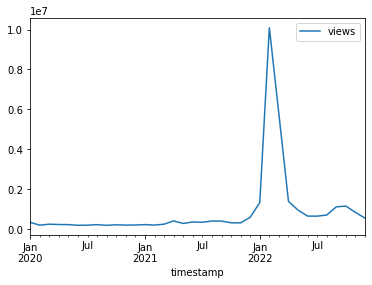

In [54]:
df_ukraine.plot('timestamp', 'views');

In [55]:
df_russia = ?
df_russia.head()

,project,article,granularity,timestamp,access,agent,views
0,en.wikipedia,Russia,monthly,2020-01-01,all-access,all-agents,568966
1,en.wikipedia,Russia,monthly,2020-02-01,all-access,all-agents,467814
2,en.wikipedia,Russia,monthly,2020-03-01,all-access,all-agents,587419
3,en.wikipedia,Russia,monthly,2020-04-01,all-access,all-agents,701076
4,en.wikipedia,Russia,monthly,2020-05-01,all-access,all-agents,630985


In [12]:
# Make a plot here

### Wikipedia-API Python Library

<div class="alert alert-warning">

In this notebook, we learned to manually craft queries for the Wikipedia API (and then the PageViews API). There's actually an unoffical Python library for the Wikipedia API, called…  `Wikipedia-API` (https://wikipedia-api.readthedocs.io/en/latest/README.html). This library makes it easier to query Wikipedia (only).

The documentation has several examples on how to use it, however, it will not be able to make complex queries. At those times, it would be necessary to delve deeper into the specifics of the Wikimedia APIs and manually craft queries.

</div>

# Homework

<div class="alert-info alert">

Compute average number of monthly page views for 19th century male and female British scientists

</div>




Let's break this exercise down into the following steps - 

<div class="alert-info alert">

1. Query the WP API for (a) the list of all ‘19th century British female scientists’ and (b) the list of all ‘19th century British male scientists’.

2. Iterate over each page in the above two lists and query the number of page views for them

3. Report the average number of page views for male and female British scientists.

4. Prepare a CSV file (or two files) to save the two lists and the associated pageviews. How would you structure your dataset?

5. Optional: The Wikipedia articles are sometimes renamed, merged, or deleted. How would you ensure that the data you extract and report in your CSV file can still be reused by researchers if the title change?

</div>

<div class="alert-info alert">

**HW1:** Query the WP API for (a) the list of all ‘19th century British female scientists’ and (b) the list of all ‘19th century British male scientists’.

-   Complete the function `all_pages_from_category` defined below
-   Call this function on (a) "Category:19th-century British women scientists" and store the result in `articles_women`, and (b) "Category:19th-century British scientists" and store the result in `articles_all`
-   Make a list `articles_men` excluding those scientists which are already present in `articles_women`
-   Print the number of women scientists and men scientists

</div>

In [57]:
WP_HEADERS = {
    
}

def all_pages_from_category(cat_name):
    """ Return all the pages in a category from Wikipedia EN. """


    r = requests.get()
    response = r.json()

    df = pd.DataFrame()
    title_of_pages = 

    # We remove ‘sub categories’, to keep only true articles:
    return [title for title in title_of_pages if 'Category' not in title]


# Wikipedia has a male-dominated hierarchical structure: women have their categories (women scientists), but men are simply listed as scientists.

articles_women = all_pages_from_category()
articles_all = all_pages_from_category()

# We can use a list comprehension to exclude women from the ‘all’ list, returning all the pages about men:
articles_men = 

In [59]:
# Print the number of men and women scientists 


nb of men scientists: 32
nb of women scientists: 84


<div class="alert-info alert">

**HW2:** Iterate over each page in the above two lists and query the number of page views for them

- Complete the function `pageviews` below. It queries WP and retrieves monthly pageviews for a `page`.
- Complete the function `pageviews_list_of_pages`. It calls `pageviews` on each of the pages listed in `list_of_pages` and returns average monthly views for each of those pages. 
- Call `pageviews_list_of_pages` on the list of women and men scientists

</div>

In [60]:

def pageviews(page):
    """ Return the monthly pageviews for a given Wikipedia page. """
    
    return df

In [77]:
def pageviews_list_of_pages(list_of_pages):
    """ Return the average monthly pageview for all the pages in a list of pages. """

    views_articles = []
    views_dfs = []

    for article_title in list_of_pages:
        # The try-except block is used to not raise an error when the PageViews API
        # returns no data (for articles without enough views).
        # try: tells Python to try to run the following code
        # If an error occurs, it will instead run the code after except:
        try:
            df_pv = ? # We call the Wikipedia PageViews API
            average_views_per_month = ?
            views_articles.append(average_views_per_month)
            views_dfs.append(df_pv)
        except:
            print("! Error for article:", article_title)
    
    views_df = pd.concat(views_dfs)

    return views_articles, views_df

In [78]:
pageviews_women, pageviews_women_df = pageviews_list_of_pages(articles_women)

! Error for article: Alice Hibbert-Ware


In [79]:
pageviews_men, pageviews_men_df = pageviews_list_of_pages(articles_men)

<div class="alert-info alert">

**HW3:** 

- Print the average number of monthly view for a 19th century female scientist 
- Print the average number of monthly view for a 19th century male scientist 

</div>

In [80]:
# Average number of monthly view for a 19th century female scientist:


2446.6524240903

In [81]:
# Average number of monthly view for a 19th century male scientist:


1443.8899936868686

<div class="alert-info alert">

**HW4:** 
Prepare a CSV file (or two files) to save the two lists and the associated pageviews. How would you structure your dataset?

</div>

<div class="alert-info alert">

**HW5 (optional):** 
The Wikipedia articles are sometimes renamed, merged, or deleted. How would you ensure that the data you extract and report in your CSV file can still be reused by researchers if the title change?

</div>

<div class="alert alert-warning">

By now, you should have obtained empirical results.
But do reflect on the quality of the experiment: were all female/male pages correctly crawled? What about ‘Alice Hibbert-Ware’?
Are you confident enough in the quality of the data to report your results?

Even if the data are publicly available, a lot of rigor is needed to not overlook the potential biases associated with data creation and curation.

</div>


## This week's Datasheet questions 

Throughout this course, we will aim to build on the practice of documenting our datasets, using the Datasheet for Datasets framework (here is an <a href="https://github.com/zykls/folktables/blob/main/datasheet.md">example of a datasheet"</a>). In the homework for this week, you designed a small dataset of pageviews for British male and female mathematicians. Let's assume you plan to release this dataset online.

How would you structure your Datasheet for this small dataset? For this week's homework, please answer the following questions:

>**What data does each instance consist of?** "Raw" data (e.g., unprocessed text or images) or features? In either case, please provide a description.
>
>...


>**Are there any errors, sources of noise, or redundancies in the dataset?** If so, please provide a description.
>
>...

>**Does the dataset contain data that, if viewed directly, might be offensive, insulting, threatening, or might otherwise cause anxiety?** If so, please describe why.
>
>...

>**Is the dataset self-contained, or does it link to or otherwise rely on external resources (e.g., websites, tweets, other datasets)?** If it links to or relies on external resources, a) are there guarantees that they will exist, and remain constant, over time; b) are there official archival versions of the complete dataset (i.e., including the external resources as they existed at the time the dataset was created); c) are there any restrictions (e.g., licenses, fees) associated with any of the external resources that might apply to a future user? Please provide descriptions of all external resources and any restrictions associated with them, as well as links or other access points, as appropriate.
>
>...




## Advanced and Optional: going further with the WikiWho API

If you are bored and want to go further at this stage, there are a lot of advanced tools developed by researchers to study Wikipedia. One of them is WikiWho by fabian flöck of the Leibniz Institute for the Social Sciences.

<div class="alert alert-info">

From https://f-squared.org/wikiwho/:
> the core functionality of wikiwho is to parse the complete set of all historical revisions (versions) of a wikipedia article in order to find out who wrote and/or removed which exact text at what point in time. this means that given a specific revision of an article (e.g., the current one) wikiwho can determine for each word and special character which user first introduced that word and if and how it was deleted/reintroduced afterwards. this functionality is not offered by wikipedia as such and wikiwho was shown to perform this task with very high accuracy (~95%) and very efficiently, being the only tool that has been scientifically proven to perform this task that well

WikiWho is a service that reports the editions on Wikipedia articles. Have a look at what it outputs for the ‘Oxford Internet Institute’ page:

<a href="https://api.wikiwho.net/en/api/v1.0.0-beta/rev_content/Oxford Internet Institute/?o_rev_id=true&editor=true&token_id=true&out=true&in=true">Oxford Internet Institute through the WikiWho API</a>

What sort of research could you do using WikiWho?

</div>